# Постановка задачи:
Требуется ознакомиться с выбранным dataset-ом, визуализировать содержащиеся в нём данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), осуществить "препроцессинг" данных и решить задачу классификации.

In [3]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
    
import pandas as pd    
import seaborn as sns           
import sklearn  

In [4]:
data = pd.read_csv("netflix-rotten-tomatoes-metacritic-imdb.csv") 
data   

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/80031595,NaN,Seung Yeon decides to chase her dream of becom...,NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,"Animal Tales,Family Comedies,Family Adventures...",NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70242630,NaN,"Shrek celebrates Halloween, Puss in Boots is c...",NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15477,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70259784,NaN,Madagascar goes wild with holiday spirit in th...,71.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
15478,DreamWorks Holiday Classics,"Animation, Comedy, Family","TV Comedies,Kids TV,TV Cartoons,TV Programmes,...",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,...,2015-04-14,Fox,https://www.netflix.com/watch/70221348,NaN,Join your DreamWorks friends for these four ho...,82.0,https://occ-0-2851-38.1.nflxso

In [5]:
data.shape

(15480, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

Признак `Series or Movie` является бинарным.

Признаки `Genre`,`Languages`, `Runtime`, `Director`, `Writer`, `Actors`, `View Rating` ... - категориальные.

Признаки `Hidden Gem Score`,`IMDb Score`, `Rotten Tomatoes Score`, `Metacritic Score`, `Awards Received` , `Awards Nominated For` - числовые.

Признак `Summary` - текстовый.



In [7]:
data['Summary'] # текстовый признак (аннотация к фильму)

0        A med student with a supernatural gift tries t...
1        When nerdy Johanna moves to London, things get...
2        Trapped in a frozen car during a blizzard, a p...
3        Upon moving into a new place, a 20-something r...
4        Inspired by her moms rebellious past and a con...
                               ...                        
15475    Seung Yeon decides to chase her dream of becom...
15476    Shrek celebrates Halloween, Puss in Boots is c...
15477    Madagascar goes wild with holiday spirit in th...
15478    Join your DreamWorks friends for these four ho...
15479    In this pair of adventures, Po tells the story...
Name: Summary, Length: 15480, dtype: object

In [8]:
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


# Визуализируем данные

<Axes: >

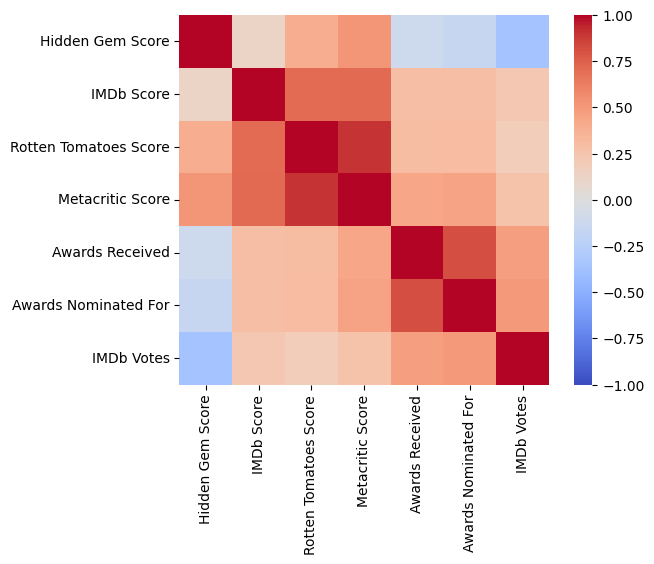

In [9]:
import sys
import seaborn as sns
corr = data.corr(numeric_only=True)
sns.heatmap(corr, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

In [10]:
corr

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
Hidden Gem Score,1.000000,0.120373,0.397905,0.521470,-0.112787,-0.159500,-0.359540
IMDb Score,0.120373,1.000000,0.710922,0.717715,0.291142,0.289843,0.229760
Rotten Tomatoes Score,0.397905,0.710922,1.000000,0.903345,0.301380,0.309572,0.181762
Metacritic Score,0.521470,0.717715,0.903345,1.000000,0.431420,0.449726,0.261384
Awards Received,-0.112787,0.291142,0.301380,0.431420,1.000000,0.817262,0.469818
Awards Nominated For,-0.159500,0.289843,0.309572,0.449726,0.817262,1.000000,0.497690
IMDb Votes,-0.359540,0.229760,0.181762,0.261384,0.469818,0.497690,1.000000


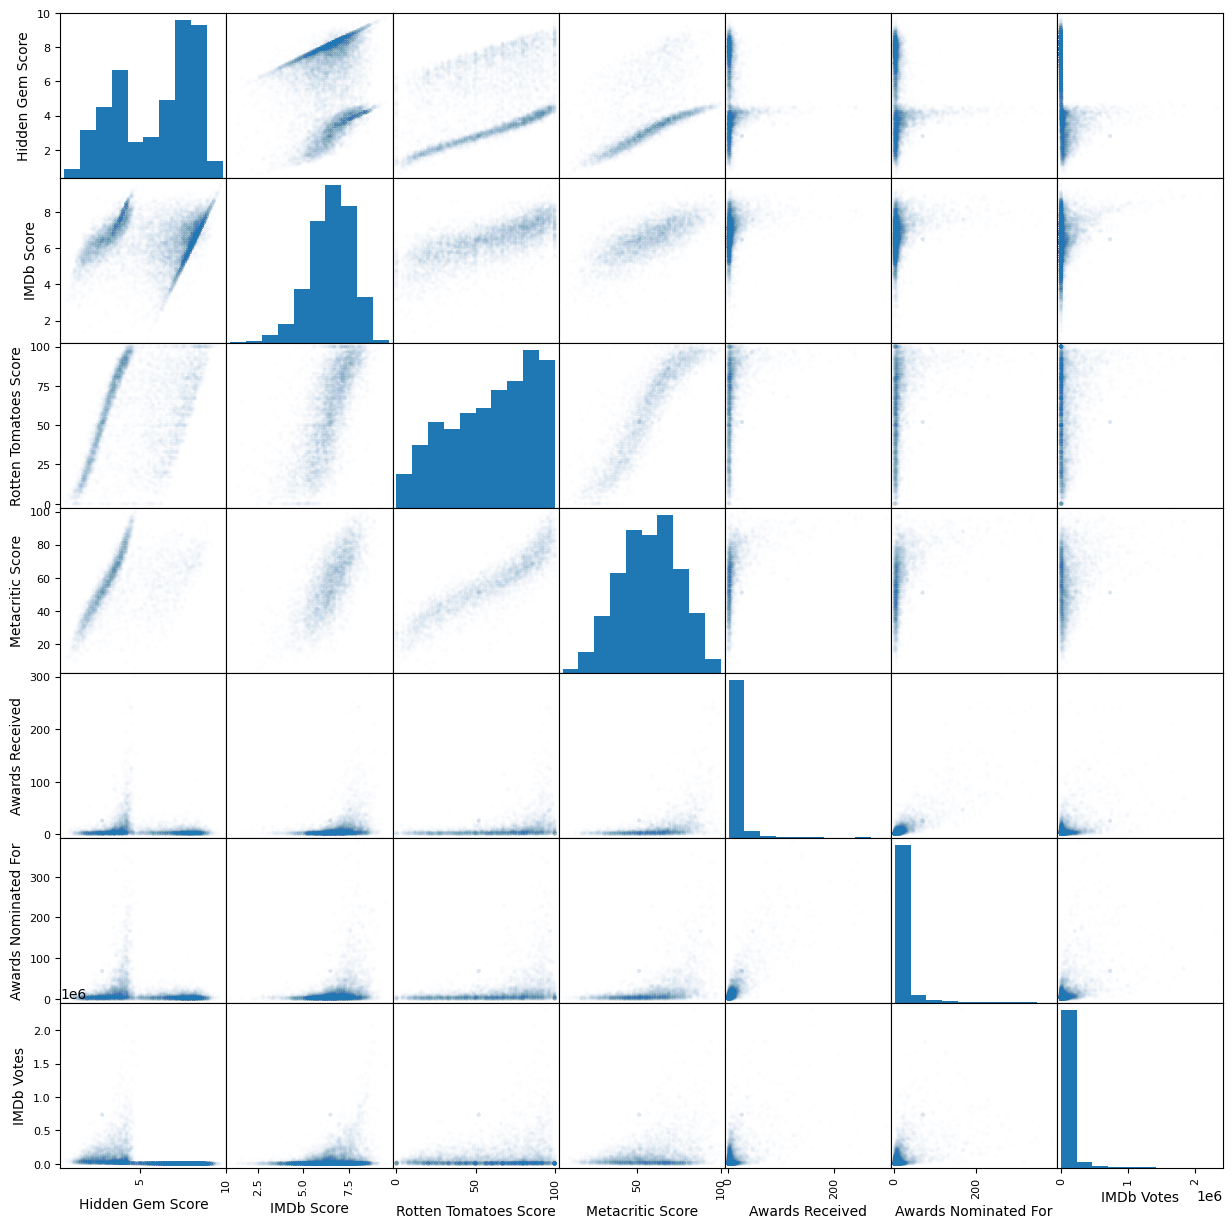

In [11]:
pd.plotting.scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

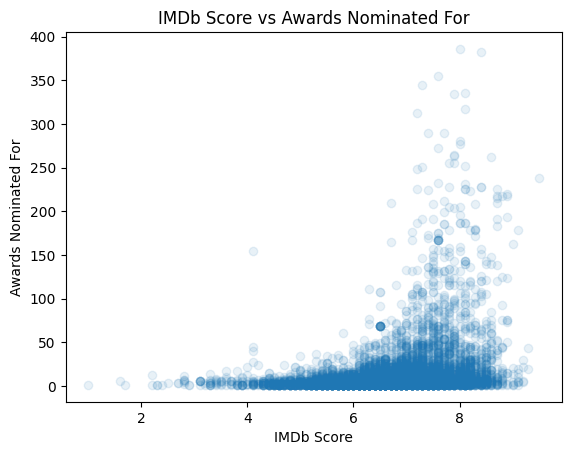

In [12]:
plt.plot(data['IMDb Score'], data['Awards Nominated For'], 'o', alpha = 0.1)

plt.xlabel('IMDb Score')
plt.ylabel('Awards Nominated For')

plt.title('IMDb Score vs Awards Nominated For')
pass

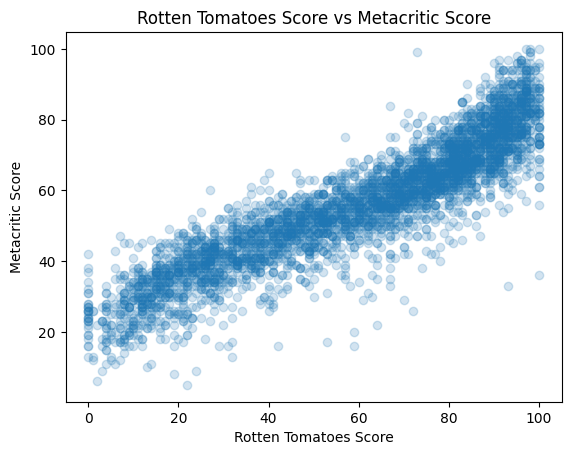

In [13]:
plt.plot(data['Rotten Tomatoes Score'], data['Metacritic Score'], 'o', alpha = 0.2)
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Metacritic Score')
plt.title('Rotten Tomatoes Score vs Metacritic Score')
pass

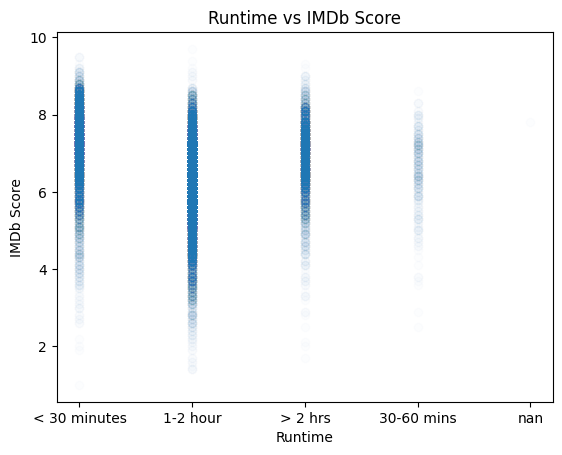

In [14]:
plt.plot(data['Runtime'].astype(str), data['IMDb Score'], 'o', alpha = 0.01)
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.title('Runtime vs IMDb Score')
pass

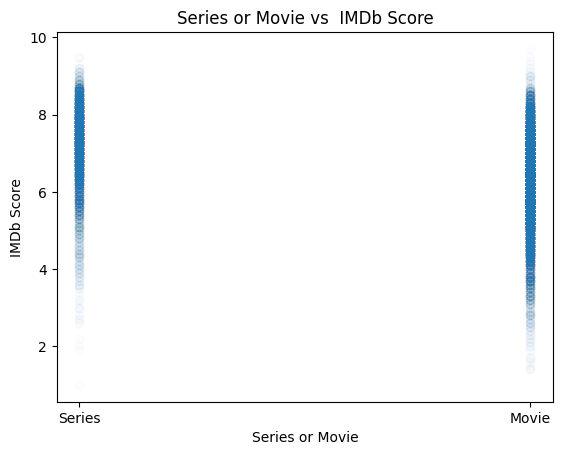

In [15]:
plt.plot(data['Series or Movie'], data['IMDb Score'], 'o', alpha = 0.01)
plt.xlabel('Series or Movie')
plt.ylabel('IMDb Score')
plt.title('Series or Movie vs  IMDb Score')
pass

По  графикам выше можно сделать вывод, что сериалы и длинные фильмы (больше 2 часов) обычно получают высокие оценки. 

Также заметим, что фильмы с высоким рейтингом IMDb довольно часто номинируются на награды.

# Подготовка данных

Посмотрим общее количество пропущенных значений в нашем датасете. 

In [16]:
data.isnull().sum() 

Title                        0
Genre                     1710
Tags                        67
Languages                 1954
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

Удалим некоторые признаки, имеющие большое количество уникальных значений. 

In [17]:
data = data.drop(labels=["Title", "Summary"], axis=1)
data = data.drop(labels=["Release Date", "Netflix Link", "Netflix Release Date", "IMDb Link"], axis=1)
data = data.drop(labels=["Image", "TMDb Trailer", "Poster"], axis=1)
data = data.drop(labels=["Boxoffice", "Country Availability", "Tags", "Trailer Site"], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre                  13770 non-null  object 
 1   Languages              13526 non-null  object 
 2   Series or Movie        15480 non-null  object 
 3   Hidden Gem Score       13379 non-null  float64
 4   Runtime                15479 non-null  object 
 5   Director               10772 non-null  object 
 6   Writer                 11150 non-null  object 
 7   Actors                 13555 non-null  object 
 8   View Rating            8456 non-null   object 
 9   IMDb Score             13381 non-null  float64
 10  Rotten Tomatoes Score  6382 non-null   float64
 11  Metacritic Score       4336 non-null   float64
 12  Awards Received        6075 non-null   float64
 13  Awards Nominated For   7661 non-null   float64
 14  Production House       5149 non-null   object 
 15  IM

### Заполнение пропущенных значений

Заполним некоторые пропущенные данные их средними значениями. Остальным присвоим другие значения.

In [18]:
data.isnull().sum().sum() # общее количество пропущенных значений 

np.int64(75750)

In [19]:
values = {"Runtime": "1-2 hour", "Hidden Gem Score": 5.937551, "View Rating": "Unrated", "IMDb Score": 6.496054, "IMDb Votes": 4.272841e+04, "Awards Received": 0,
          "Awards Nominated For": 0}
data = data.fillna(value=values)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre                  13770 non-null  object 
 1   Languages              13526 non-null  object 
 2   Series or Movie        15480 non-null  object 
 3   Hidden Gem Score       15480 non-null  float64
 4   Runtime                15480 non-null  object 
 5   Director               10772 non-null  object 
 6   Writer                 11150 non-null  object 
 7   Actors                 13555 non-null  object 
 8   View Rating            15480 non-null  object 
 9   IMDb Score             15480 non-null  float64
 10  Rotten Tomatoes Score  6382 non-null   float64
 11  Metacritic Score       4336 non-null   float64
 12  Awards Received        15480 non-null  float64
 13  Awards Nominated For   15480 non-null  float64
 14  Production House       5149 non-null   object 
 15  IM

In [21]:
data.isnull().sum().sum()

np.int64(45200)

Удалим столбцы где пропущенных значений слишком много.

In [22]:
data = data.drop(labels=["Rotten Tomatoes Score", "Metacritic Score", "Production House"], axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9901 entries, 0 to 15473
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genre                 9901 non-null   object 
 1   Languages             9901 non-null   object 
 2   Series or Movie       9901 non-null   object 
 3   Hidden Gem Score      9901 non-null   float64
 4   Runtime               9901 non-null   object 
 5   Director              9901 non-null   object 
 6   Writer                9901 non-null   object 
 7   Actors                9901 non-null   object 
 8   View Rating           9901 non-null   object 
 9   IMDb Score            9901 non-null   float64
 10  Awards Received       9901 non-null   float64
 11  Awards Nominated For  9901 non-null   float64
 12  IMDb Votes            9901 non-null   float64
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


Списки для категориальных и числовых признаков:

In [23]:
categorical_columns = [feature for feature in data.columns if data[feature].dtype.name == 'object']
numerical_columns   = [feature for feature in data.columns if ((data[feature].dtype.name != 'object') & (feature != "IMDb Score"))]

In [24]:
categorical_columns


['Genre',
 'Languages',
 'Series or Movie',
 'Runtime',
 'Director',
 'Writer',
 'Actors',
 'View Rating']

In [25]:
numerical_columns

['Hidden Gem Score', 'Awards Received', 'Awards Nominated For', 'IMDb Votes']

Разделим категориальные признаки на бинарные и небинарные. 

In [26]:
binary_columns    = [feature for feature in categorical_columns if data.describe(include = [object])[feature]['unique'] == 2]
print(binary_columns)

['Series or Movie']


Для бинарных признаков заменим значения на 0 и 1.

In [27]:
data.loc[data['Series or Movie'] == 'Series', 'Series or Movie'] = 0
data.loc[data['Series or Movie'] == 'Movie', 'Series or Movie'] = 1

In [28]:
categorical_columns

['Genre',
 'Languages',
 'Series or Movie',
 'Runtime',
 'Director',
 'Writer',
 'Actors',
 'View Rating']

К категориальным признакам применим метод бинаризации.

In [29]:
Runtime = data['Runtime'].str.get_dummies()
Director = data['Director'].str.get_dummies(",")
View = data['View Rating'].str.get_dummies()
Writer = data['Writer'].str.get_dummies(",")
Actors = data['Actors'].str.get_dummies(",")
Genre = data['Genre'].str.get_dummies(",")
Languages = data['Languages'].str.get_dummies(",")

In [30]:
data_nonbinary = pd.concat((Runtime, Director, View, Actors,Writer, Genre, Languages), axis = 1)
data_nonbinary

,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs,Aamir Khan,Aaron Horvath,Aaron Seelman,Aaron Seltzer,Abbas Alibhai Burmawalla,Abdullah Al Noor,...,Turkish,Ukrainian,Urdu,Vietnamese,Wayuu,Wolof,Xhosa,Yiddish,Yoruba,Zulu
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15462,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15463,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15464,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15465,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Округлим рейтиг IMDb до целого числа. Далее будем его предсказывать.

In [31]:
data['IMDb Score'] = np.round(data['IMDb Score'])
data['IMDb Score'].describe()

count    9901.000000
mean        6.276437
std         1.118639
min         1.000000
25%         6.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: IMDb Score, dtype: float64

Нормализуем числовые признаки.

In [32]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical

,Hidden Gem Score,Awards Received,Awards Nominated For,IMDb Votes
0,-0.525479,4.928957,2.051895,1.081938
1,0.679474,-0.248390,-0.365579,-0.363267
2,0.411707,-0.319313,-0.365579,-0.371223
5,1.393521,-0.319313,-0.365579,-0.382530
8,1.259637,-0.177468,-0.323167,-0.382836
...,...,...,...,...
15462,-1.373409,-0.248390,-0.238343,-0.309668
15463,-1.730433,-0.248390,-0.323167,-0.095792
15464,-0.927130,-0.319313,-0.323167,-0.077703
15465,-1.061014,-0.319313,0.100951,0.810927


Объединяем данные.

In [33]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns], data["IMDb Score"]), axis = 1)

# Разбиение на обучающую и тестовую выборки

Хотим предсказать рейтинг IMDb.

In [34]:
X = data.drop('IMDb Score', axis = 1) 
y = data['IMDb Score']

In [35]:
X=X.to_numpy()
y=y.to_numpy()

Разобьем данные на обучающую и тестовую выборки: 90% - обучающая выборка, 10% - тестовая

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

8910 991 (8910,) (991,)


In [37]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

# Обучение

Используем классификатор k-ближайших соседей.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print("err_train=", err_train)
print("err_test=", err_test)


print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

err_train= 0.49292929292929294
err_test= 0.5196770938446014
[[   0    0    1    0    0    1    0    1    0]
 [   0    0    1    0    2   23    1    1    0]
 [   0    0    3    1    5   86    9    6    0]
 [   0    0    1    7   23  330   53   37    0]
 [   0    0    1    5   71  852  162   55    0]
 [   0    0    0    0   34 2764  479  110    0]
 [   0    0    1    0   10 1219 1273  140    0]
 [   0    0    0    0    2  278  432  396    0]
 [   0    0    0    0    0    3    9   18    4]]

[[  0   0   0   0   3   0   1   0]
 [  0   0   0   2   5   1   1   0]
 [  0   0   1   4  36  11   5   0]
 [  0   0   0   6  90   9   9   0]
 [  0   0   0   5 303  63  10   0]
 [  0   0   0   3 156 122  24   0]
 [  0   0   0   0  27  45  44   0]
 [  0   0   0   0   0   0   5   0]]



Наилучший результат достигается при n_neighbors = 27.

# Вывод
Погрешность на обучающей и тестовой выборках оказалось достаточно большой, что можно объяснить недостаточностью данных в датасете. В датасете оказалось много пропущенных значений.